In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

In [2]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [3]:
y = train["label"]
x = train.drop(labels = ["label"], axis = 1)

x = x.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [4]:
from sklearn.model_selection import train_test_split

x_training, x_validation, y_training, y_validation = train_test_split(x,
                                                                      y,
                                                                      test_size=0.33,
                                                                      shuffle=True)

In [5]:
y_training = to_categorical(y_training, num_classes = 10)
y_validation = to_categorical(y_validation, num_classes = 10)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.3,
                                    zoom_range=0.15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1)

In [7]:
datagen_iterator = data_generator.flow(x_training,y_training)

In [48]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128,(3, 3), activation='relu',padding='same'))
model.add(Conv2D(256,(3, 3), activation='relu',padding='valid'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 256)        0         
 g2D)                                                 

In [51]:
batch_size = 64
epochs = 10

In [52]:
model_history = model.fit(datagen_iterator, epochs = epochs, validation_data = (x_validation, y_validation),
                      verbose = 2, steps_per_epoch=x_training.shape[0] // batch_size)

C:\Users\User\AppData\Local\Temp/ipykernel_14732/276899761.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(datagen_iterator, epochs = epochs, validation_data = (x_validation, y_validation),


Epoch 1/10
439/439 - 105s - loss: 0.6260 - accuracy: 0.7923 - val_loss: 12.9615 - val_accuracy: 0.9794 - 105s/epoch - 240ms/step
Epoch 2/10
439/439 - 93s - loss: 0.1869 - accuracy: 0.9463 - val_loss: 17.3799 - val_accuracy: 0.9809 - 93s/epoch - 212ms/step
Epoch 3/10
439/439 - 92s - loss: 0.1261 - accuracy: 0.9649 - val_loss: 8.8670 - val_accuracy: 0.9864 - 92s/epoch - 210ms/step
Epoch 4/10
439/439 - 92s - loss: 0.1034 - accuracy: 0.9703 - val_loss: 11.4101 - val_accuracy: 0.9870 - 92s/epoch - 211ms/step
Epoch 5/10
439/439 - 92s - loss: 0.0954 - accuracy: 0.9740 - val_loss: 11.3107 - val_accuracy: 0.9888 - 92s/epoch - 210ms/step
Epoch 6/10
439/439 - 93s - loss: 0.0892 - accuracy: 0.9748 - val_loss: 7.2996 - val_accuracy: 0.9896 - 93s/epoch - 212ms/step
Epoch 7/10
439/439 - 93s - loss: 0.0777 - accuracy: 0.9790 - val_loss: 10.6504 - val_accuracy: 0.9829 - 93s/epoch - 213ms/step
Epoch 8/10
439/439 - 94s - loss: 0.0726 - accuracy: 0.9811 - val_loss: 8.4691 - val_accuracy: 0.9890 - 94s/epoc

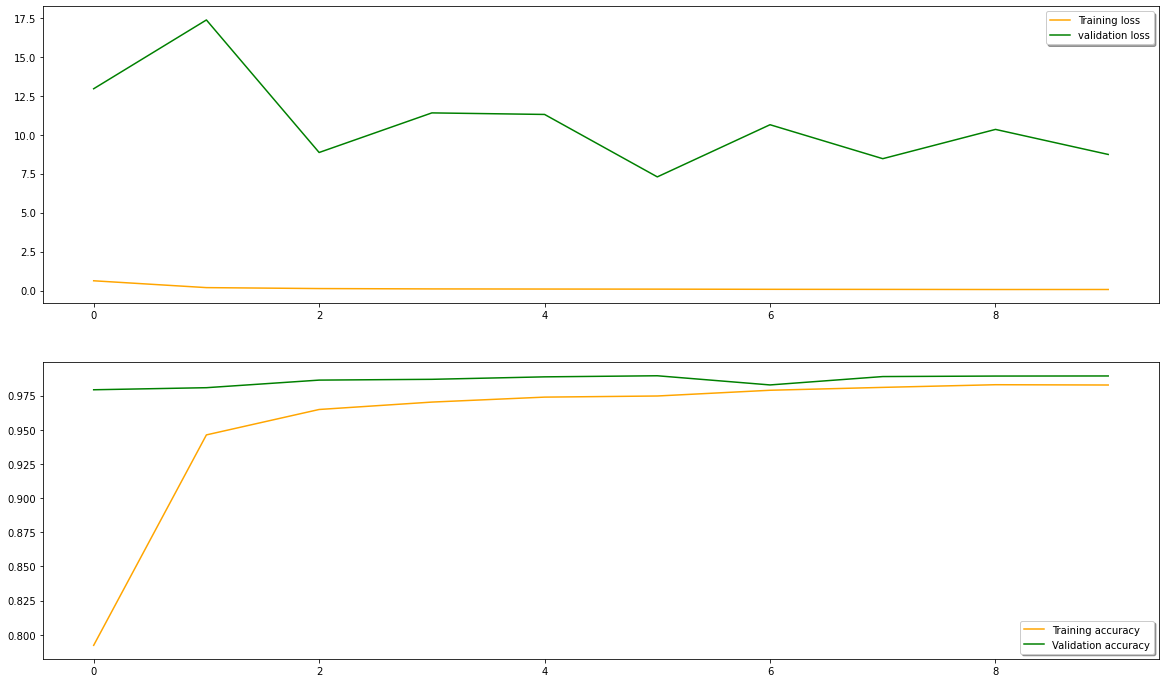

In [53]:
fig, ax = plt.subplots(2,1)
fig.set_figwidth(20)
fig.set_figheight(12)
ax[0].plot(model_history.history['loss'], color='orange', label="Training loss")
ax[0].plot(model_history.history['val_loss'], color='green', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_history.history['accuracy'], color='orange', label="Training accuracy")
ax[1].plot(model_history.history['val_accuracy'], color='green',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [54]:
y_test = model.predict(test)
y_test = np.argmax(y_test, axis=1)

In [55]:
submission = pd.DataFrame({'ImageId': np.arange(1,y_test.shape[0] + 1), 'Label': y_test})
submission.to_csv('submission.csv', index=False)